In [ ]:
#本节课的学习内容
#1.霍夫检测-线和圆
#2.轮廓检测
#3.模板匹配算法
#4.模板匹配算法的不足

In [2]:
#加载基础的库
import numpy as np
import skimage
import matplotlib.pyplot as plt

In [ ]:
#霍夫变换

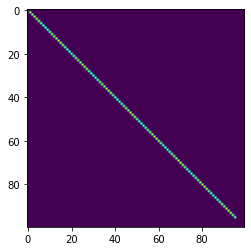

In [4]:
#根据第一节课学到的方法画一张测试图片

#加载画图需要模块
from skimage import draw
#画图
img=np.zeros([100,100])
h,w=draw.line(1,1,95,95)
img[h,w]=1

#画一条线

plt.imshow(img)


In [5]:
#加载霍夫变换需要的模块

import skimage.transform as transform

In [7]:
# hough线变换

h,theta,d=transform.hough_line(img)

print(h.shape)




(284, 180)


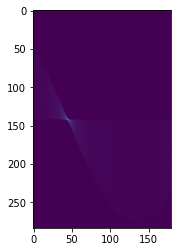

In [8]:
plt.imshow(h)

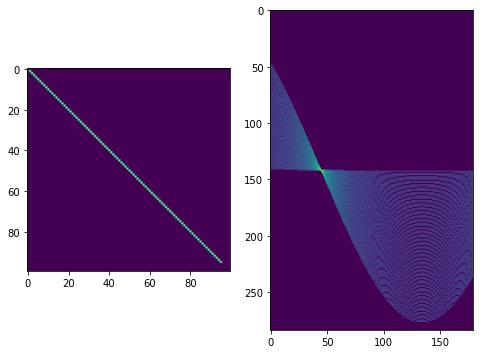

In [9]:
#显示生成的结果图
#显示生成的结果图
plt.figure('hough_line',figsize=(8,8))
plt.subplot(121)
plt.imshow(img) 
plt.subplot(122)
plt.imshow(np.log(1+h))
plt.show()

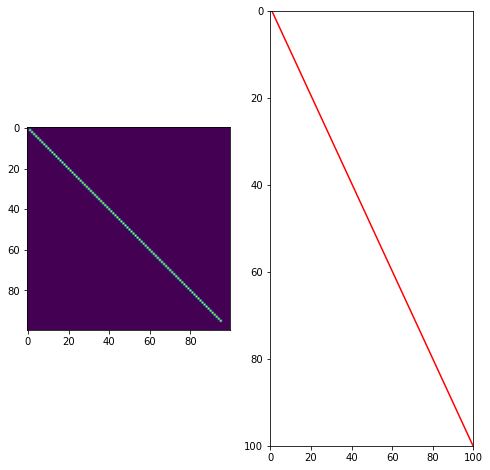

In [10]:
#显示生成的效果图

plt.figure('hough_line',figsize=(8,8))
plt.subplot(121)
plt.imshow(img) 
plt.subplot(122)
row1, col1 = img.shape
for _, angle, dist in zip(*transform.hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - col1 * np.cos(angle)) / np.sin(angle)
    plt.plot((0, col1), (y0, y1), '-r')
plt.axis((0,col1,row1,0))
plt.show()

In [ ]:
#霍夫圆检测

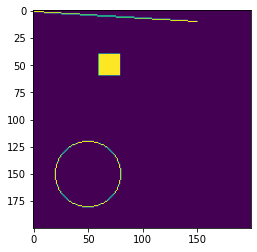

In [11]:
#画图
img=np.zeros([200,200])

#画一条线
h,w=draw.line(1,1,10,150)
img[h,w]=1
#画一圆
h,w=draw.circle_perimeter(150,50,30)
img[h,w]=1

#h,w=draw.circle(150,150,15) #大圆
#img[h,w]=1

#画一个矩形

img[40:60,60:80]=1

plt.imshow(img)





In [13]:
#开始霍夫圆检测

#首先设定检测的半径范围

radii=np.arange(5,50,5)
print(radii)

#霍夫检测
circle=transform.hough_circle(img,radii)
print(circle.shape)


[ 5 10 15 20 25 30 35 40 45]
(9, 200, 200)


1.000000000000004


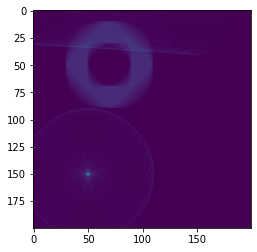

In [23]:
#展示识别效果,看不同半径范围检测到的最大值
plt.imshow(circle[5,:,:])
print(np.max(circle[5,:,:]))

[[ 42 103]]


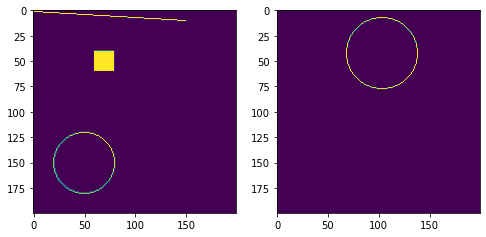

In [21]:
#把检测到的圆画出来
r=6
#设置检测到的半径
import skimage.feature as feature
peak=feature.peak_local_max(circle[r,:,:],num_peaks=1)
#找到最大值的位置

print(peak)

#画圆
img2=img.copy()
cx, cy =draw.circle_perimeter(peak[0][0], peak[0][1], radii[r])
img2[cx,cy]=255

plt.figure("detect_circle",figsize=(8,8))
plt.subplot(121)
plt.imshow(img) 
plt.subplot(122)
plt.imshow(img2)
plt.show()



D:\Users\Anaconda3\envs\env_cv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  after removing the cwd from sys.path.


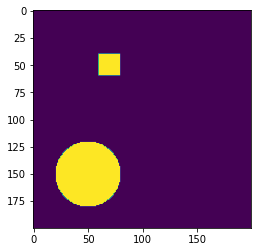

In [24]:

#画图
img=np.zeros([200,200])
#画一圆
h,w=draw.circle(150,50,30)
img[h,w]=1

#h,w=draw.circle(150,150,15) #大圆
#img[h,w]=1

#画一个正方形

img[40:60,60:80]=1
plt.imshow(img)



In [25]:



#使用其他模组，检测轮廓模组find_contours
import skimage.measure as measure

contours=measure.find_contours(img,0.5)


#查看一个List数组的内容
print(len(contours))






2


In [27]:
print(contours[1])

[[179.5  57. ]
 [179.5  56. ]
 [179.5  55. ]
 [179.5  54. ]
 [179.5  53. ]
 [179.5  52. ]
 [179.5  51. ]
 [179.5  50. ]
 [179.5  49. ]
 [179.5  48. ]
 [179.5  47. ]
 [179.5  46. ]
 [179.5  45. ]
 [179.5  44. ]
 [179.5  43. ]
 [179.   42.5]
 [178.5  42. ]
 [178.5  41. ]
 [178.5  40. ]
 [178.   39.5]
 [177.5  39. ]
 [177.5  38. ]
 [177.5  37. ]
 [177.   36.5]
 [176.5  36. ]
 [176.   35.5]
 [175.5  35. ]
 [175.5  34. ]
 [175.   33.5]
 [174.5  33. ]
 [174.   32.5]
 [173.5  32. ]
 [173.5  31. ]
 [173.   30.5]
 [172.5  30. ]
 [172.   29.5]
 [171.5  29. ]
 [171.   28.5]
 [170.5  28. ]
 [170.   27.5]
 [169.5  27. ]
 [169.   26.5]
 [168.   26.5]
 [167.5  26. ]
 [167.   25.5]
 [166.5  25. ]
 [166.   24.5]
 [165.   24.5]
 [164.5  24. ]
 [164.   23.5]
 [163.5  23. ]
 [163.   22.5]
 [162.   22.5]
 [161.   22.5]
 [160.5  22. ]
 [160.   21.5]
 [159.   21.5]
 [158.   21.5]
 [157.5  21. ]
 [157.   20.5]
 [156.   20.5]
 [155.   20.5]
 [154.   20.5]
 [153.   20.5]
 [152.   20.5]
 [151.   20.5]
 [150.   2

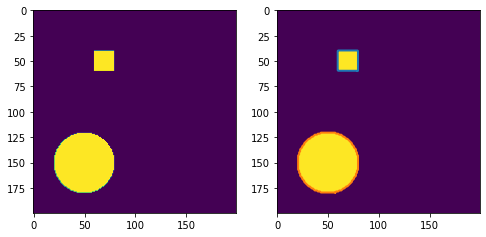

In [28]:
#画图画出contours


In [ ]:
#模板匹配

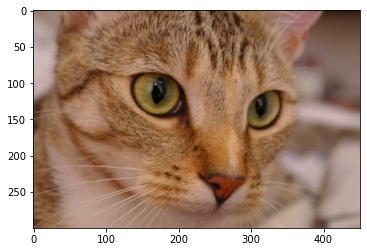

In [62]:
# 加载猫图
import skimage.io as io
img=io.imread("data/cat.jpg")
plt.imshow(img)

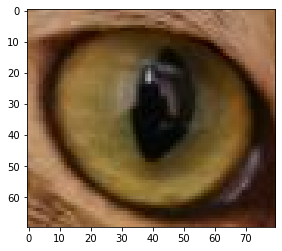

In [64]:
#制作眼睛模板
template=img[80:150,130:210,:]
plt.imshow(template)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(300, 451, 3)


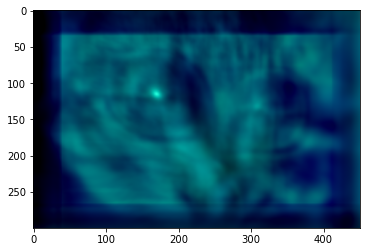

In [68]:
#进行模板匹配
res=skimage.feature.match_template(img,template,pad_input=True,mode="constant",constant_values=0)
print(res.shape)
#显示匹配度最高的点
plt.imshow(res)



In [69]:
print(np.max(res))

1.0000000000000002


In [73]:
print(index[0][0])

115


D:\Users\Anaconda3\envs\env_cv\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  This is separate from the ipykernel package so we can avoid doing imports until


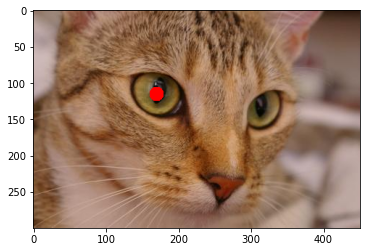

In [71]:
#展示定位效果
index=np.where(res==np.max(res))
h,w=skimage.draw.circle(index[0][0],index[1][0],10)
skimage.draw.set_color(img,[h,w],[255,0,0])
plt.imshow(img)




In [57]:
#但是如果我们把图片旋转了会怎么样？


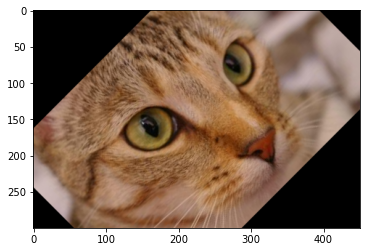

In [74]:
img=io.imread("data/cat.jpg")

import skimage.transform as transform
img2=transform.rotate(img,45)
plt.imshow(img2)

D:\Users\Anaconda3\envs\env_cv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.5879410095019019


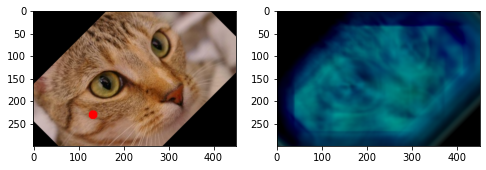

In [77]:
#进行匹配
res=skimage.feature.match_template(img2,template,pad_input=True,mode="constant",constant_values=0)
print(np.max(res))
#查看新的匹配度

index=np.where(res==np.max(res))
h,w=skimage.draw.circle(index[0][0],index[1][0],10)
skimage.draw.set_color(img2,[h,w],[255,0,0])

plt.figure("detected",figsize=(8,8))
plt.subplot(121)
plt.imshow(img2)
plt.subplot(122)
plt.imshow(res)



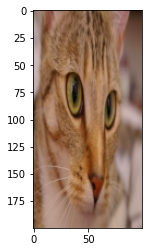

In [78]:
#对图像进行缩放
img2=transform.resize(img,[200,100])
plt.imshow(img2)

D:\Users\Anaconda3\envs\env_cv\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: circle is deprecated in favor of disk.circle will be removed in version 0.19
  import sys
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.49953678801651136


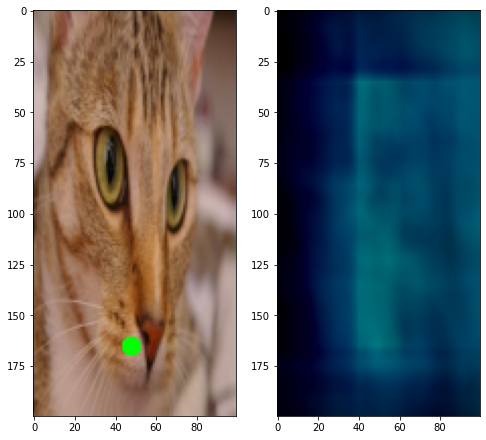

In [81]:
#进行匹配

res=skimage.feature.match_template(img2,template,pad_input=True,mode="constant",constant_values=0)
print(np.max(res))
#查看新的匹配度
index=np.where(res==np.max(res))
h,w=skimage.draw.circle(index[0][0],index[1][0],5)
skimage.draw.set_color(img2,[h,w],[0,255,0])

plt.figure("detected",figsize=(8,8))
plt.subplot(121)
plt.imshow(img2)
plt.subplot(122)
plt.imshow(res)


In [61]:
#本节课的学习内容
#1.霍夫检测-线和圆
#2.轮廓检测
#3.模板匹配算法
#4.模板匹配算法的不足